<a href="https://colab.research.google.com/github/Yashvishe13/Deep-Learning/blob/main/book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required Libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading dataset
books_df = pd.read_csv('dataset/Preprocessed_data.csv')

In [ ]:
# Viewing dataset
books_df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [ ]:
# Viewing Dataset info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [ ]:
# Checking number of languages in dataset
books_df['Language'].unique()

array(['en', '9', 'de', 'fr', 'es', 'ca', 'it', 'da', 'nl', 'pt', 'gl',
       'ro', 'no', 'el', 'ms', 'la', 'ru', 'zh-CN', 'ga', 'pl', 'tl',
       'th', 'ja', 'cy', 'fa', 'eo', 'gd', 'hi', 'vi', 'ar', 'zh-TW',
       'ko', 'sv'], dtype=object)

In [ ]:
# Selecting books which are written in English
books_eng = books_df[books_df['Language'] == 'en']

In [ ]:
# Checking for null values
books_eng.isnull().sum()

Unnamed: 0                 0
user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                    7765
state                  12121
country                21044
dtype: int64

In [ ]:
# Checking number of categories
books_eng['Category'].value_counts()

['Fiction']                           381065
['Juvenile Fiction']                   39330
['Biography & Autobiography']          22295
['Humor']                               8429
['History']                             8213
                                       ...  
['ML (Computer program language)']         1
['Marijuana.']                             1
['Africa, French-speaking West']           1
['Crusades.']                              1
['Ex-police officers']                     1
Name: Category, Length: 5996, dtype: int64

In [ ]:
# Making all column names lowercase
books_eng.columns = books_eng.columns.str.lower()

In [ ]:
# Dropping unnecessary columsn
books_eng = books_eng.drop(columns = ['unnamed: 0', 'language'])

In [ ]:
books_eng['year_of_publication'] = books_eng['year_of_publication'].astype(int)
books_eng['age'] = books_eng['age'].astype(int)

In [ ]:
# Selecting books with highest number of ratings
num_ratings = books_eng.groupby('book_title', as_index = False)['rating'].count()
num_ratings = num_ratings.rename(columns = {'rating' : 'num_of_ratings'})
most_ratings = num_ratings.sort_values(by = 'num_of_ratings', ascending = False).head(10)

In [ ]:
# Color palette.
my_color_pal = [
    'MediumSeaGreen',
    'LightSeaGreen',
    'MediumAquaMarine',
    'LightSkyBlue',
    'LightSteelblue',
    'PowderBlue',
    'Plum',
    'LightSalmon',
    'LightPink',
    'Moccasin',
]

Text(0.5, 0, 'Number of Ratings')

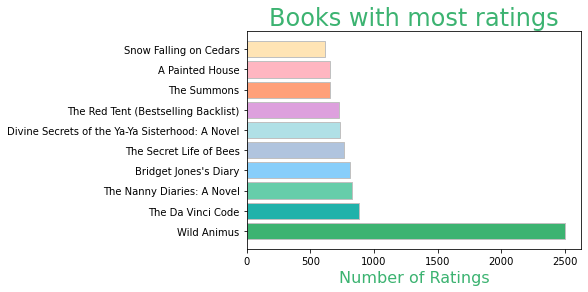

In [ ]:
# plotting books with highest number of ratings
y = most_ratings['book_title']
x = most_ratings['num_of_ratings']
most_viz = plt.barh(y, x, color = my_color_pal, edgecolor = 'silver')
plt.title('Books with most ratings', fontsize = 24, color = 'MediumSeaGreen')
plt.xlabel('Number of Ratings', fontsize=16, color='MediumSeaGreen')

In [ ]:
# Selecting books with highest average rating
avg_rating = books_eng.groupby('book_title', as_index = False)['rating'].mean()
avg_rating = avg_rating.rename(columns = {'rating' : 'avg_ratings'})
avg_rating.sort_values(by = 'avg_ratings', ascending = False).head(3)

,book_title,avg_ratings
27444,Donna Kooler's 555 Christmas Cross-Stitch Designs,10.0
28055,Drawing for the Artistically Undiscovered,10.0
91272,The Book of Job,10.0


In [ ]:
# Combining number of ratings and average ratings
ratings = num_ratings.merge(avg_rating, how= 'inner', on = 'book_title')
ratings['num_of_ratings'].sort_values(ascending = False).head(20)

123495    2502
94208      886
103805     828
15243      815
108227     768
26855      732
106914     723
109970     654
3063       652
82403      618
110452     615
40730      571
4078       542
109856     542
115441     531
37710      526
47555      506
99243      506
92900      480
38580      470
Name: num_of_ratings, dtype: int64

In [ ]:
# Selecting books with reasonable amount of ratings and also are highest rated
ratings_over_470 = ratings[ratings['num_of_ratings'] >= 470]
top_books = ratings_over_470.sort_values(by= 'avg_ratings', ascending = False).head(10)

In [ ]:
top_books

,book_title,num_of_ratings,avg_ratings
40730,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175
94208,The Da Vinci Code,886,4.647856
108227,The Secret Life of Bees,768,4.442708
106914,The Red Tent (Bestselling Backlist),723,4.334716
37710,Girl with a Pearl Earring,526,4.218631
38580,Good in Bed,470,4.040426
115441,Timeline,531,3.757062
47555,Interview with the Vampire,506,3.535573
103805,The Nanny Diaries: A Novel,828,3.530193
15243,Bridget Jones's Diary,815,3.527607


In [ ]:
# Shortening titles.
top_books.iloc[0, 0] = "Harry Potter and the Sorcerer's Stone"
top_books.iloc[3, 0] = 'The Red Tent'
top_books.iloc[8, 0] = 'The Nanny Diaries'

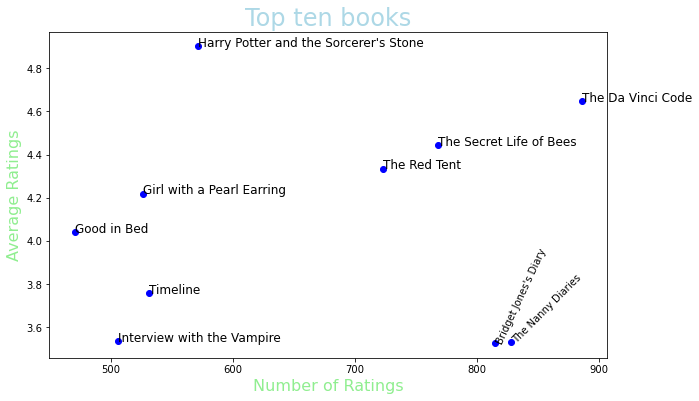

In [ ]:
x = list(top_books['num_of_ratings'])
y = list(top_books['avg_ratings'])
labels = list(top_books['book_title'])
plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = 'blue')
plt.title('Top ten books', fontsize = 24, color = 'lightBlue')
plt.xlabel('Number of Ratings', fontsize = 16, color = 'lightGreen')
plt.ylabel('Average Ratings', fontsize = 16, color = 'lightGreen')
for i, txt in enumerate(labels):
    if i == 8:
        plt.annotate(txt, (x[i], y[i]), rotation = 45, size = 10)
    elif i == 9:
        plt.annotate(txt, (x[i], y[i]), rotation = 65, size = 10)
    else:
        plt.annotate(txt, (x[i], y[i]), size=12)
plt.show()

In [ ]:
book_summary = books_eng[1: 200000].groupby(['book_title', 'summary'], as_index = False)['rating'].mean()
book_summary['book_title'].drop_duplicates(inplace = True)
book_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7525 entries, 0 to 7524
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book_title  7525 non-null   object 
 1   summary     7525 non-null   object 
 2   rating      7525 non-null   float64
dtypes: float64(1), object(2)
memory usage: 235.2+ KB


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
# Replacing null values with empty string
book_summary['summary'] = book_summary['summary'].fillna('')

In [ ]:
# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(book_summary['summary'])

# Compute the cosine similarity matrix.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Construct a reverse map of indices and book titles.
indices = pd.Series(book_summary.index, index=book_summary['book_title']).drop_duplicates()

In [ ]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(book_summary.index, index=book_summary['book_title']).drop_duplicates()

In [ ]:
def get_recommendations(book_title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[book_title]
    print(idx)
    
    # Similarity scores
    similarity_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the six most similar books
    similarity_scores =  similarity_scores[1:6]

    # Get the book indices
    book_indices = [i[0] for i in similarity_scores]

    # Return the top 5 most similar books
    return book_summary['book_title'].iloc[book_indices]

In [ ]:
get_recommendations("Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))")

2306


2306    Harry Potter and the Sorcerer's Stone (Harry P...
2304       Harry Potter and the Sorcerer's Stone (Book 1)
2300         Harry Potter and the Goblet of Fire (Book 4)
2301    Harry Potter and the Order of the Phoenix (Boo...
2303    Harry Potter and the Prisoner of Azkaban (Book 3)
Name: book_title, dtype: object

In [ ]:
get_recommendations('The Da Vinci Code')

5426


5427         The Da Vinci Code (Random House Large Print)
2008    Fortune Is a River : Leonardo Da Vinci and Nic...
604                                               Baggage
5809    The How to Think Like Leonardo da Vinci Workbo...
2215    Great Book Of Whodunit Puzzles: Mini-Mysteries...
Name: book_title, dtype: object

In [ ]:
get_recommendations('Wild Animus')

7360


4419                                 Second Ring of Power
2169         Godel, Escher, Bach: An Eternal Golden Braid
859     Breaking Down the Wall of Silence: The Liberat...
5497                                    The Dog I.Q. Test
7367    Wild Man's Journey: Reflections on Male Spirit...
Name: book_title, dtype: object

In [ ]:
type(cosine_sim)

numpy.ndarray

In [ ]:
from numpy import savetxt
savetxt('sim_matrix.csv', cosine_sim, delimiter=',')

In [ ]:
type(indices)

In [ ]:
indices

In [ ]:
savetxt('indices.csv', indices, delimiter=',')

In [ ]:
indices.to_csv('indices_imp.csv')

In [ ]:
idx = indices["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]